# Project Title - Data analysis of 'Data Scientist Job Market in the U.S' 

TODO - I am goining to do data analysis of a data set of U.S job market. The Data set contain different columns like '**job title**', '**job decription**' ,'**location**' , and '**reviews**' .I got this dataset from **kagle.com**,
I will try to find different job roles available in the domain, also try to analyse main skillset for those positions. We also have location column in our dataset so we will analyse which location has higher openings. Coming to tool parts I am going to use **python** **Numpy**, **Pandas** for data cleaning and analyzing and **matplotlib** graph for analysis and presentaion purpose. From the [Data Analysis with Python: Zero to Pandas](zerotopandas.com): I leaned so much new things from this course and eager to apply them.

Let us save and upload our work to Jovian before continuing.

## Data Preparation and Cleaning





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Firstly we will import the dataset file which is in csv format

In [3]:
df1=pd.read_csv('alldata.csv')
df1.head(5)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


Now lets find out total structure of data in the dataframe using df.info function

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 163.3+ KB


Lets check for null values using isna() method 

In [4]:
df1.isna().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [5]:
df1[df1.position.isna()]

,position,company,description,reviews,location
302,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN
3337,NaN,NaN,NaN,NaN,NaN
5014,NaN,NaN,NaN,NaN,NaN
5059,NaN,NaN,NaN,NaN,NaN
5103,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN
6093,NaN,NaN,NaN,NaN,NaN


here are 11 rows in dataframe that are completey NA so we have to drop them using dropna 

In [6]:
df2=df1.dropna(how='all')

In [7]:
df2.isna().sum()

position          0
company           0
description       0
reviews        1627
location          0
dtype: int64

Now we only left with one column with null values which is number of reviews.
If there are no reviews for perticular position then we will asume it to be 0 
so we will fill na with zero

In [8]:
df3=df2.fillna(0)

In [9]:
df3.isna().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

In [10]:
test='salman  '
test.rstrip()

'salman'

# Cleaning Location Column
we will use rstrip method on column location to remove blank spaces before or after the datapoint

In [11]:
df3['newlocation'] = [row.rstrip() for row in df3['location']]

In [12]:
df3.head()

,position,company,description,reviews,location,newlocation
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301","Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303","Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA","Atlanta, GA"


now we will drop old location column as it will not be used 

In [13]:
df3.drop(['location'], axis = 1,inplace=True)

In [14]:
df3.head()

,position,company,description,reviews,newlocation
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


By using regular expression we will remove all the digits from location column and make values in the column in the format of "City,state"

In [15]:
import re
df3['newlocation']=[re.sub('[\s*]+[\d]+[\d]+[\d]+[\d]+[\d]','',row) for row in df3['newlocation']]

In [16]:
df3.head()

,position,company,description,reviews,newlocation
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


Now lets split the location column into City and State for further use

In [17]:
df3[['City','state']] = df3['newlocation'].str.split(',', expand=True)
df3.head()

,position,company,description,reviews,newlocation,City,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA


Drop the old newlocation column

In [18]:
df3.drop(['newlocation'], axis = 1,inplace=True)

In [19]:
df3.head()

,position,company,description,reviews,City,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,Atlanta,GA


# Cleaning Description column
we will try to replace some word in description column by space so that we will get more clear data 

In [20]:
df3['description']=[i.replace('\n',' ')for i in df3['description']]
df3['description']=[i.replace('Job','')for i in df3['description']]
df3['description']=[i.replace('Description','')for i in df3['description']]

In [21]:
df3.head()

,position,company,description,reviews,City,state
0,Development Director,ALS TDI,Development Director ALS Therapy Development I...,0.0,Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"""The road that leads to accomplishment is n...",0.0,Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION The Emory University Department of...,550.0,Atlanta,GA


we will lower all values beacuse it will easy to find occurance of specific wor 

In [22]:
df3['description']=[f.lower() for f in df3.description]

In [23]:
df3.head()

,position,company,description,reviews,City,state
0,Development Director,ALS TDI,development director als therapy development i...,0.0,Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"""the road that leads to accomplishment is n...",0.0,Atlanta,GA
2,Data Scientist,Xpert Staffing,"growing company located in the atlanta, ga are...",0.0,Atlanta,GA
3,Data Analyst,Operation HOPE,department: program operationsposition locatio...,44.0,Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,description the emory university department of...,550.0,Atlanta,GA


# Cleaning Company Column
We will lower all the data for uniformality


In [24]:
df3['company']=[v.lower() for v in df3.company]

In [25]:
len(df3.company.unique())

2211

# Cleaning Position Column
We will lower all the data for uniformality

In [26]:
df3['position']=[g.lower() for g in df3.position]

In [27]:
df3.head()

,position,company,description,reviews,City,state
0,development director,als tdi,development director als therapy development i...,0.0,Atlanta,GA
1,an ostentatiously-excitable principal research...,the hexagon lavish,"""the road that leads to accomplishment is n...",0.0,Atlanta,GA
2,data scientist,xpert staffing,"growing company located in the atlanta, ga are...",0.0,Atlanta,GA
3,data analyst,operation hope,department: program operationsposition locatio...,44.0,Atlanta,GA
4,assistant professor -tt - signal processing & ...,emory university,description the emory university department of...,550.0,Atlanta,GA


## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

exploring position column and classify roles in 3 main category i.e. Data scientist , Data Analyst and Data engineer

# Analyzing position column

In [29]:
total_positions=df3.position.shape[0]
total_positions

6953

We will take addition of count for common keywords for different roles so that we can categories them into 3 main categories

In [ ]:
no_of_data_scientist=[a.count('science') for a in df3.position]+[z.count('scientist') for z in df3.position]+[b.count('ml') for b in df3.position]+[z.count('machine learning') for z in df3.position]+[z.count('deep learning') for z in df3.position]+[w.count('research') for w in df3.position]
no_of_data_scientist

In [31]:
No_of_data_scientist=pd.Series(no_of_data_scientist).sum()
No_of_data_scientist

4834

Same for data analyst we will count number of data analyst positions 

In [32]:
no_of_data_analyst=[c.count('analyst') for c in df3.position]

In [33]:
No_of_data_analyst=pd.Series(no_of_data_analyst).sum()
No_of_data_analyst

889

Now for data engineer we will add count 

In [34]:
no_of_data_engineer=[d.count('data engineer') for d in df3.position]+[e.count('data engineering') for e in df3.position]+[r.count('etl') for r in df3.position]+[a.count('architect') for a in df3.position]+[b.count('hadoop') for b in df3.position]+[c.count('warehouse') for c in df3.position]

In [35]:
No_of_data_engineer=pd.Series(no_of_data_engineer).sum()
No_of_data_engineer

299

Now we will draw a pie chart so that we can easily see how many perctage job opening are of specific type 

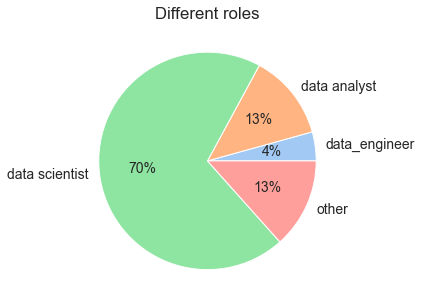

<Figure size 648x360 with 0 Axes>

In [36]:

data = [(299/6953),(889/6953),(4834/6953),(931/6953)]
labels = ['data_engineer', 'data analyst', 'data scientist','other']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%');

plt.title('Different roles');
plt.show();

plt.savefig('Different roles.png');

From the above pie chart we can clearly say that there 70 jobs are for data scientist

# Analyse company column

In [37]:
df3.head()

,position,company,description,reviews,City,state
0,development director,als tdi,development director als therapy development i...,0.0,Atlanta,GA
1,an ostentatiously-excitable principal research...,the hexagon lavish,"""the road that leads to accomplishment is n...",0.0,Atlanta,GA
2,data scientist,xpert staffing,"growing company located in the atlanta, ga are...",0.0,Atlanta,GA
3,data analyst,operation hope,department: program operationsposition locatio...,44.0,Atlanta,GA
4,assistant professor -tt - signal processing & ...,emory university,description the emory university department of...,550.0,Atlanta,GA


We will find out no of open positions for different comapany.
for that we will group by company and use count function to count no of position

In [38]:
company_wise_position=df3.groupby('company')[['position']].count()
company_wise_position

,position
company,
10x genomics,1
1199seiu family of funds,1
1871,1
23andme,17
24 hour fitness,1
...,...
zylotech,2
zymergen,6
zynga,2


Now we will sort values to find out top companies

In [39]:
top_companies=company_wise_position.sort_values(by='position',ascending=False)
Top_employers=top_companies.head(15)
Top_employers.head()

,position
company,
amazon.com,358
ball aerospace,187
microsoft,137
google,134
nyu langone health,77



Now lests represt above data on graph to simply analyze

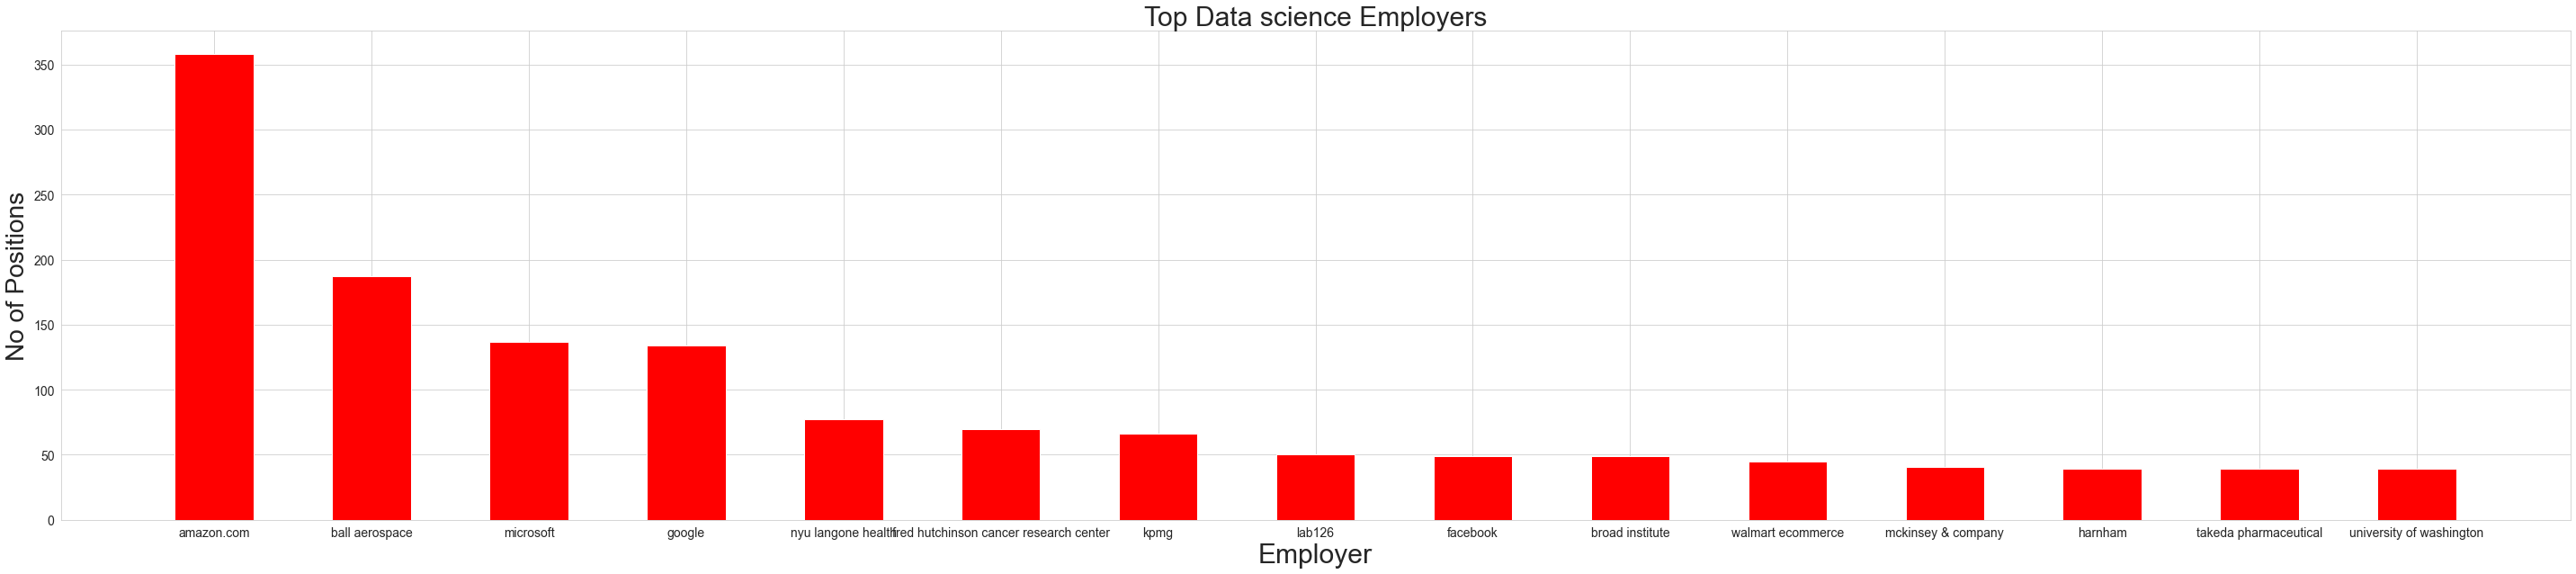

In [40]:
plt.figure(figsize=(50,10))

plt.bar(Top_employers.index,Top_employers['position'],width=0.5,color='red')

plt.title('Top Data science Employers',fontsize=30)

plt.xlabel('Employer',fontsize=30);
plt.ylabel('No of Positions',fontsize=28);

plt.savefig('Top Data science Employers.png')

From the above chart we can say that amazon is top employer

# anlyzing Description column

In [41]:
df3.head()

,position,company,description,reviews,City,state
0,development director,als tdi,development director als therapy development i...,0.0,Atlanta,GA
1,an ostentatiously-excitable principal research...,the hexagon lavish,"""the road that leads to accomplishment is n...",0.0,Atlanta,GA
2,data scientist,xpert staffing,"growing company located in the atlanta, ga are...",0.0,Atlanta,GA
3,data analyst,operation hope,department: program operationsposition locatio...,44.0,Atlanta,GA
4,assistant professor -tt - signal processing & ...,emory university,description the emory university department of...,550.0,Atlanta,GA


the main thing which is always mentioned in the job description is that tools required for perticular position 
so will anlyze that

We will find how many time "python" tool is repeacted in decription

In [42]:
df3['description'].str.count('python').sum()

3717

Now as we require to count frequency for different tool it will better to write function that will return count 


In [43]:
def count_freq(tools):
  freq=df3['description'].str.count(tools).sum()
  return freq

Now we need take a list of most commonly used or known tool for data science. Here we take tool named list. Now will run count_freq() function on each element of the list 
We will save that frequency in a list called frequency

In [44]:
tool=['python','excel','sql','aws','spark','java','scala','hadoop','sas','tabelu','linux','hive','matlab','powerbi']
frequency=[]

for i in tool:
  a=(count_freq(i))
  frequency.append(a)

In [45]:
frequency

[3717, 5831, 3029, 1706, 1306, 1968, 1911, 1121, 1314, 0, 630, 621, 608, 31]

We need to make a Dataframe for analysis purpose.

In [46]:
tool_freq = pd.DataFrame(
    {'Tool': tool,
     'Frequency': frequency
    })

In [47]:
tool_freq

,Tool,Frequency
0,python,3717
1,excel,5831
2,sql,3029
3,aws,1706
4,spark,1306
5,java,1968
6,scala,1911
7,hadoop,1121
8,sas,1314
9,tabelu,0


We can sort these dataframe by frequency to get most demanded tool in JD

In [48]:
most_demanded_tool=tool_freq.sort_values(by='Frequency',ascending=False)
most_demanded_tool.head(1)

,Tool,Frequency
1,excel,5831


Analysis of City Column

We can find out number of position open in specfic city by using group by function

In [49]:
city_wise_position=df3.groupby('City')[['position']].count()
city_wise_position

,position
City,
Alameda,10
Allendale,2
Atlanta,269
Austin,213
Bedminster,1
...,...
Washington,340
West Orange,1
Whippany,1


By using sort method we can find out top cities with most number of openings

In [50]:
top_cities=city_wise_position.sort_values(by='position',ascending=False)
Top_cities=top_cities.head(15)
Top_cities.head()

,position
City,
New York,848
Seattle,777
Cambridge,694
Boston,629
San Francisco,564


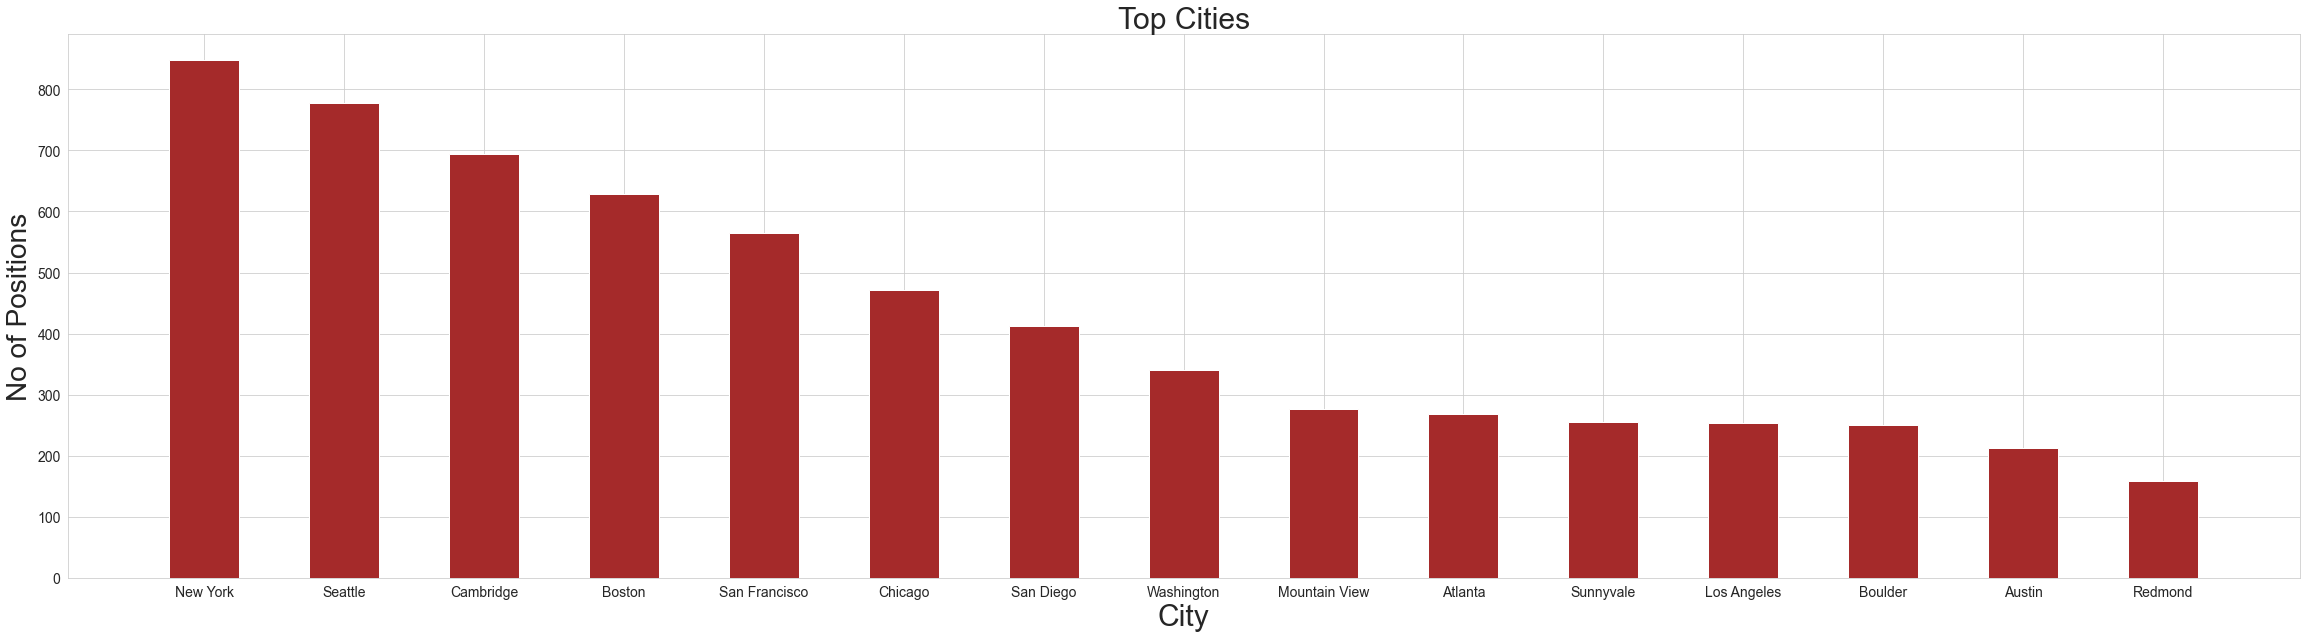

In [51]:
plt.figure(figsize=(40,10))

plt.bar(Top_cities.index,Top_cities['position'],width=0.5,color='brown')

plt.title('Top Cities',fontsize=30)

plt.xlabel('City',fontsize=30);
plt.ylabel('No of Positions',fontsize=28);

plt.savefig('Top Cities.png')

From the above chart we can clearly see newyork is top city with most number of openings

# Analysis using State column

In [52]:
state_wise_position=df3.groupby('state')[['position']].count()
state_wise_position

,position
state,
CA,2152
CO,251
DC,340
GA,269
IL,471
MA,1323
NJ,68
NY,926
TX,218


In [53]:
top_state=state_wise_position.sort_values(by='position',ascending=False)
Top_state=top_state.head(20)
Top_state.head(20)

,position
state,
CA,2152
MA,1323
WA,935
NY,926
IL,471
DC,340
GA,269
CO,251
TX,218


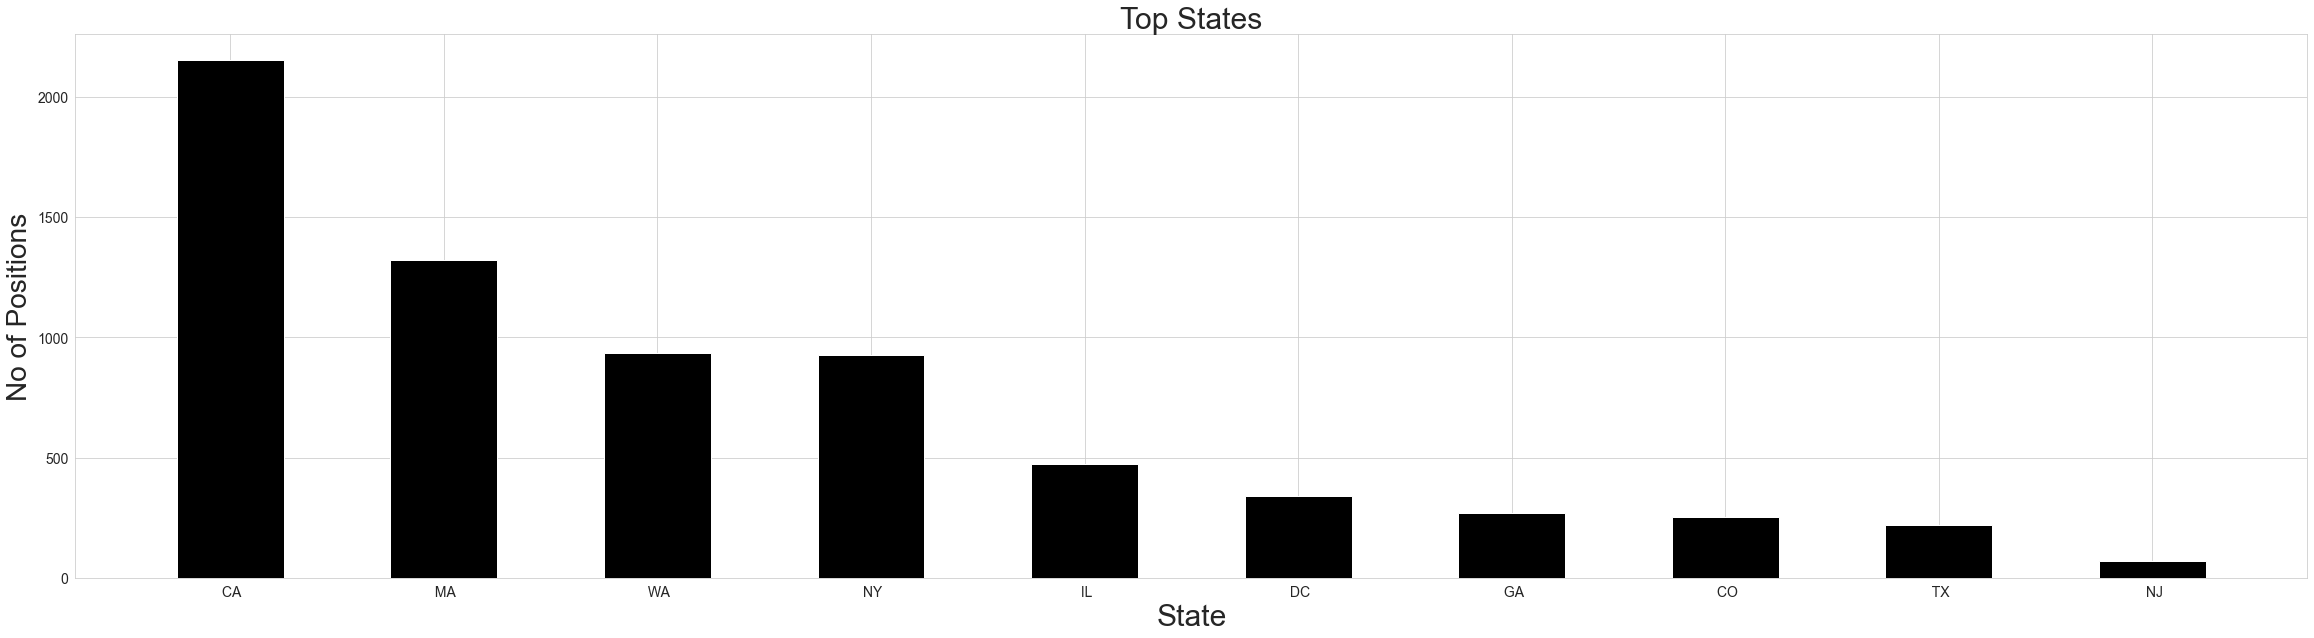

In [54]:
plt.figure(figsize=(40,10))

plt.bar(Top_state.index,Top_state['position'],width=0.5,color='black')

plt.title('Top States',fontsize=30)

plt.xlabel('State',fontsize=30);
plt.ylabel('No of Positions',fontsize=28);

plt.savefig('Top states.png')

From the chart we can clearly see CA i.e. Calefornia has most number of openings

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions




#### Q1: total number of job positions in the given data set?

In [55]:
df3['position'].shape

(6953,)

In [56]:
no_of_position=df3['position'].shape[0]

In [57]:
print("Total number of positions are",format(no_of_position))

Total number of positions are 6953


#### Q2: what percentage of job position as Data Scientist?

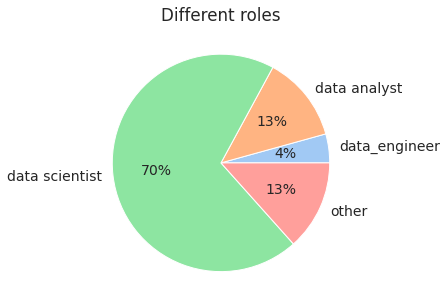

From the above graph we can see that 70% roles are of Data scientist

#### Q3: Which are the top 10 employers for data science jobs?

In [58]:
top_ten_emp=Top_employers.head(10)
top_ten_emp

,position
company,
amazon.com,358
ball aerospace,187
microsoft,137
google,134
nyu langone health,77
fred hutchinson cancer research center,70
kpmg,66
lab126,50
facebook,49


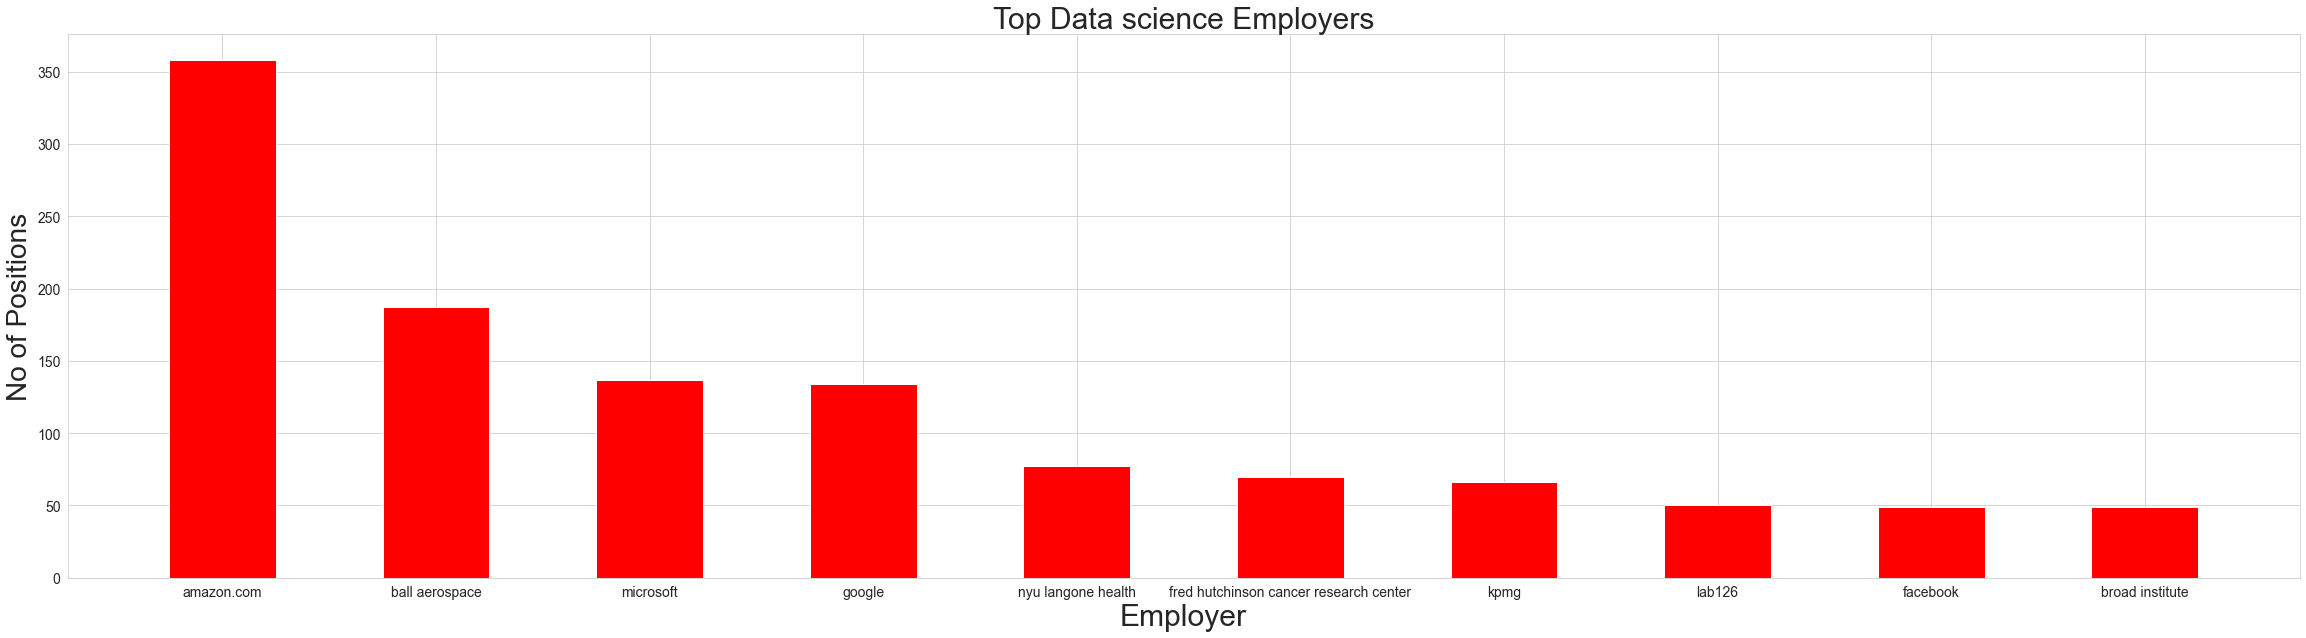

In [59]:
plt.figure(figsize=(40,10))

plt.bar(top_ten_emp.index,top_ten_emp['position'],width=0.5,color='red')

plt.title('Top Data science Employers',fontsize=30)

plt.xlabel('Employer',fontsize=30);
plt.ylabel('No of Positions',fontsize=28);

plt.savefig('Top 10 emp.png')

We have see top 10 company bars in the chart 

#### Q4: What are top 10 Tools employers are looking for?

In [60]:
top_10_tool=tool_freq.sort_values(by='Frequency',ascending=False).head(10)
top_10_tool

,Tool,Frequency
1,excel,5831
0,python,3717
2,sql,3029
5,java,1968
6,scala,1911
3,aws,1706
8,sas,1314
4,spark,1306
7,hadoop,1121
10,linux,630


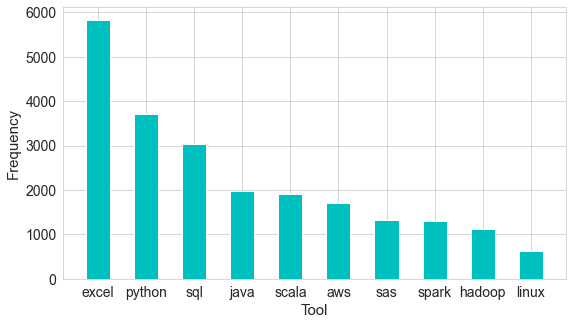

In [61]:
plt.bar(top_10_tool['Tool'],top_10_tool['Frequency'],width=0.5,color='c')

plt.xlabel('Tool',fontsize=15);
plt.ylabel('Frequency',fontsize=15);

#### Q5: Which are top 5 states for data science jobs?

In [62]:
top_5_state=top_state.head(5).index
top_5_state

Index([' CA', ' MA', ' WA', ' NY', ' IL'], dtype='object', name='state')

In [63]:
j=1
for i in top_5_state:
  print("top "+str(j)+str(i))
  j+=1

top 1 CA
top 2 MA
top 3 WA
top 4 NY
top 5 IL


Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

From the whole analyis we find out


1.   Top role in Data Science Field
2.   Top Employers
3.   Top States and Cities with most opening 
4.   Most demanded skills 

We find many important insights using this data